In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## 2.1

In [2]:
df = pd.read_csv("week2.csv")

In [3]:
df.head()

,Unnamed: 0,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,Day_Perc_Change,Trend
0,1,M&amp;M,EQ,2017-05-16,1375.65,1377.00,1380.50,1363.1,1364.15,1366.35,1371.22,516012,7.075634e+08,29075,334469,64.82,2017,5,-0.006760,Slight/NoChange
1,2,M&amp;M,EQ,2017-05-17,1366.35,1363.00,1384.35,1360.4,1379.00,1378.80,1378.56,920884,1.269497e+09,32299,689649,74.89,2017,5,0.009112,Slight/NoChange
2,3,M&amp;M,EQ,2017-05-18,1378.80,1369.00,1372.00,1347.5,1347.50,1352.85,1361.70,1217846,1.658344e+09,20476,1043736,85.70,2017,5,-0.018821,Slight/NoChange
3,4,M&amp;M,EQ,2017-05-19,1352.85,1350.00,1357.60,1328.5,1338.20,1333.40,1344.80,976742,1.313522e+09,36297,773590,79.20,2017,5,-0.014377,Slight/NoChange
4,5,M&amp;M,EQ,2017-05-22,1333.40,1340.15,1341.95,1301.1,1307.00,1306.25,1313.89,436797,5.739011e+08,26521,261661,59.90,2017,5,-0.020361,Slight/NoChange


In [4]:
df.shape

(493, 20)

In [5]:
df.dtypes

Unnamed: 0                  int64
Symbol                     object
Series                     object
Date                       object
Prev Close                float64
Open Price                float64
High Price                float64
Low Price                 float64
Last Price                float64
Close Price               float64
Average Price             float64
Total Traded Quantity       int64
Turnover                  float64
No. of Trades               int64
Deliverable Qty             int64
% Dly Qt to Traded Qty    float64
Year                        int64
Month                       int64
Day_Perc_Change           float64
Trend                      object
dtype: object

In [6]:
df_1 = df.drop(["Unnamed: 0", "Date"], axis=1)
df_1["Date"] = pd.to_datetime(df["Date"])

In [7]:
df_1.dtypes

Symbol                            object
Series                            object
Prev Close                       float64
Open Price                       float64
High Price                       float64
Low Price                        float64
Last Price                       float64
Close Price                      float64
Average Price                    float64
Total Traded Quantity              int64
Turnover                         float64
No. of Trades                      int64
Deliverable Qty                    int64
% Dly Qt to Traded Qty           float64
Year                               int64
Month                              int64
Day_Perc_Change                  float64
Trend                             object
Date                      datetime64[ns]
dtype: object

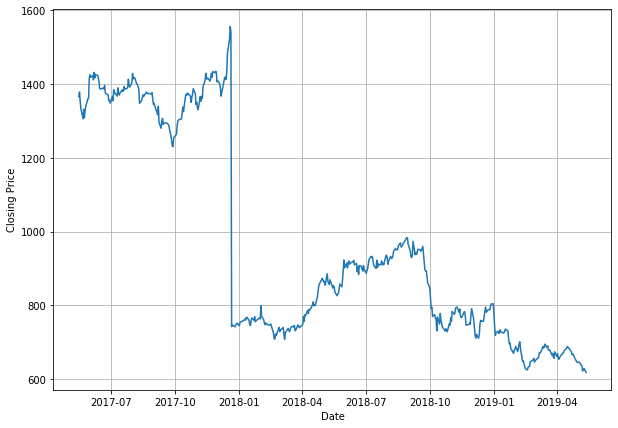

In [8]:
df_temp = df_1[['Date','Close Price']].set_index('Date')
plt.figure(figsize=(10,7))
plt.plot(df_temp)
plt.grid()
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

## 2.2

Making a Stem Plot

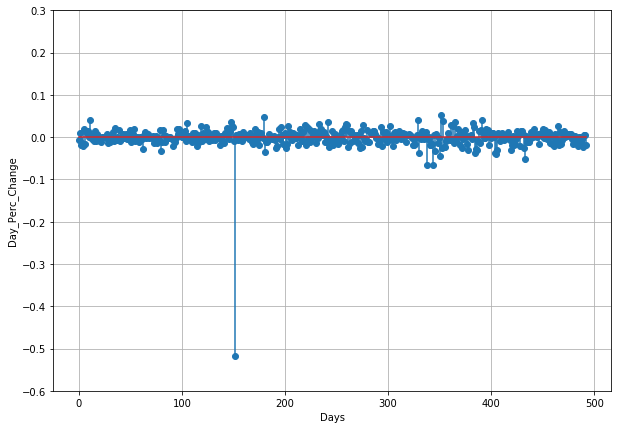

In [10]:
df_temp = df_1[['Date','Day_Perc_Change']].set_index('Date')
plt.figure(figsize=(10,7))
plt.stem(df_temp, use_line_collection=True)
plt.ylim(-0.6,0.3)
plt.grid()
plt.xlabel("Days")
plt.ylabel("Day_Perc_Change")
plt.show()

As we can see, there is a large negative drop at around 150 days. The same fluctuation is depicted in the closing price plot, where we can see a large drop in the closing price towards the end of the year 2017.

## 2.3

Daily volume and percentage stem plot to it.

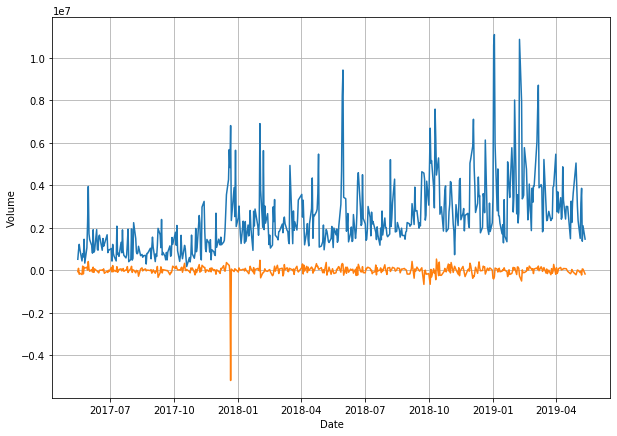

In [11]:
df_temp_1 = df_1[['Date','Total Traded Quantity']].set_index('Date')
df_temp_2 = df_1[['Date','Day_Perc_Change']].set_index('Date')
plt.figure(figsize=(10,7))
plt.grid()
plt.plot(df_temp_1)
plt.plot(df_temp_2*10000000) #multiplying by 10^7 to see fluctuations
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

## 2.4

Pie Chart and Bar Plot

In [12]:
df_trend = df_1.groupby("Trend").sum()
df_trend.head()

,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,Day_Perc_Change
Trend,,,,,,,,,,,,,,,
Slight Negative,1541.75,767.00,767.0,738.95,742.85,742.2,746.46,6803736,5.078683e+09,79258,4677871,68.75,2017,12,-0.518599
Slight/NoChange,475200.60,476265.75,480910.6,470349.20,475116.10,475242.1,475720.80,1178068476,1.024077e+12,32712092,664641508,28617.24,992788,3187,-0.014312


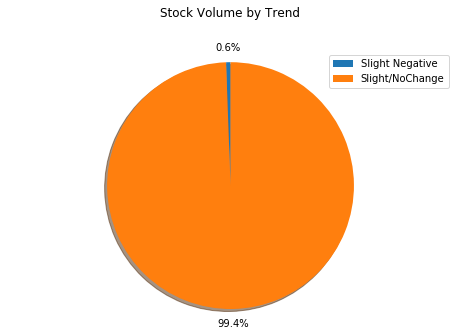

In [13]:
plt.figure(figsize=(8,5))
plt.pie(df_trend['Total Traded Quantity'], labels=None,
        autopct='%1.1f%%', startangle=90, shadow=True,       
        pctdistance=1.12)
plt.title('Stock Volume by Trend', y=1.1)
plt.legend(labels=df_trend.index, loc='upper right') 
plt.axis('equal')
plt.show()

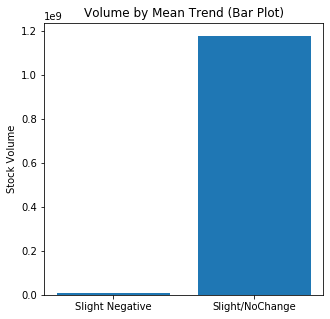

In [14]:
df_trend_mean = df_trend.groupby('Trend').mean()
plt.figure(figsize=(5,5))
plt.bar(df_trend_mean.index, height=df_trend_mean['Total Traded Quantity'])
plt.title("Volume by Mean Trend (Bar Plot)")
plt.ylabel("Stock Volume")
plt.show()

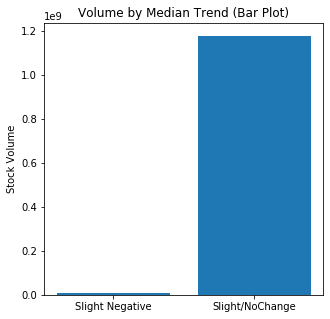

In [15]:
df_trend_mean = df_trend.groupby('Trend').median()
plt.figure(figsize=(5,5))
plt.bar(df_trend_mean.index, height=df_trend_mean['Total Traded Quantity'])
plt.title("Volume by Median Trend (Bar Plot)")
plt.ylabel("Stock Volume")
plt.show()

## 2.5

Plotting Histogram of Percentage Daily Changes

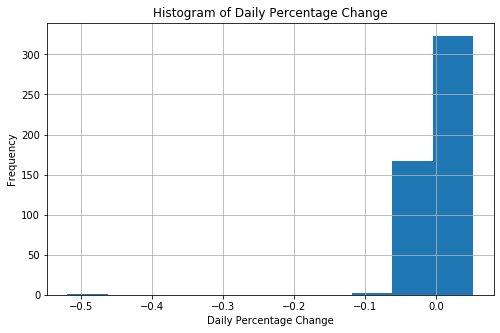

In [16]:
plt.figure(figsize=(8,5))
plt.hist(df_1['Day_Perc_Change'])
plt.title("Histogram of Daily Percentage Change")
plt.xlabel("Daily Percentage Change")
plt.ylabel("Frequency")
plt.grid()
plt.show()

## 2.6

Correlation plot between 5 diffrent stock prices

In [17]:
hero = pd.read_csv("HEROMOTOCO.csv")[pd.read_csv("HEROMOTOCO.csv").Series.eq('EQ')]
mnm = pd.read_csv("M&M.csv")[pd.read_csv("M&M.csv").Series.eq('EQ')]
maruti = pd.read_csv("MARUTI.csv")[pd.read_csv("MARUTI.csv").Series.eq('EQ')]
reliance = pd.read_csv("RELIANCE.csv")[pd.read_csv("RELIANCE.csv").Series.eq('EQ')]
tcs = pd.read_csv("TCS.csv")[pd.read_csv("TCS.csv").Series.eq('EQ')]

In [18]:
hero.rename(columns = {'Close Price':'hero'}, inplace = True)
mnm.rename(columns = {'Close Price':'mnm'}, inplace = True)
maruti.rename(columns = {'Close Price':'maruti'}, inplace = True)
reliance.rename(columns = {'Close Price':'reliance'}, inplace = True)
tcs.rename(columns = {'Close Price':'tcs'}, inplace = True)

In [19]:
frames = [hero['hero'],mnm['mnm'],maruti['maruti'],reliance['reliance'],tcs['tcs'],hero['Date']]

In [20]:
price_combine_1 = pd.concat(frames, axis = 1)

In [21]:
price_combine_1.head()

,hero,mnm,maruti,reliance,tcs,Date
0,3515.45,1375.65,6823.90,1344.10,2365.10,15-May-2017
1,3619.40,1366.35,6953.95,1356.30,2429.15,16-May-2017
2,3645.95,1378.80,6958.20,1353.10,2455.35,17-May-2017
3,3592.05,1352.85,6831.05,1327.35,2536.20,18-May-2017
4,3571.65,1333.40,6790.55,1318.85,2507.15,19-May-2017


In [22]:
price_combine_1['Date'] = price_combine_1['Date'].astype('datetime64')

In [23]:
price_combine_1 = price_combine_1.groupby('Date').sum()

In [24]:
price_combine_2 = price_combine_1.pct_change()
price_combine_2 = price_combine_1.replace([np.inf, -np.inf], np.nan).dropna() #Drop NaN rows

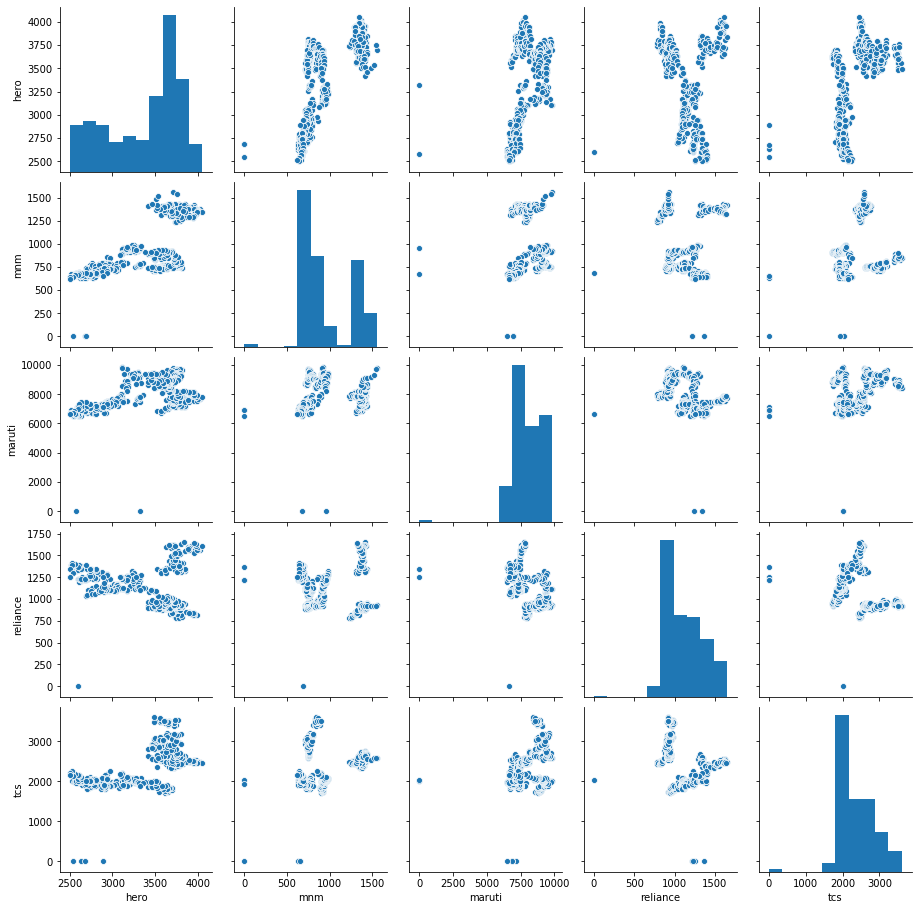

In [25]:
sns.pairplot(price_combine_2)
plt.show()

## 2.7

Volatality of share

In [26]:
df_2 = df_1.copy()
df_temp = df_2.filter(['Close Price','Date']).set_index('Date')
df_temp = df_temp.pct_change().dropna()

In [27]:
df_temp.head()

,Close Price
Date,
2017-05-17,0.009112
2017-05-18,-0.018821
2017-05-19,-0.014377
2017-05-22,-0.020361
2017-05-23,0.019522


In [28]:
volatility_mnm = df_temp.rolling(10).std().dropna() #calculating 10 day SD

In [29]:
volatility_mnm.head()

,Close Price
Date,
2017-05-30,0.015825
2017-05-31,0.020467
2017-06-01,0.018989
2017-06-02,0.018098
2017-06-05,0.015576


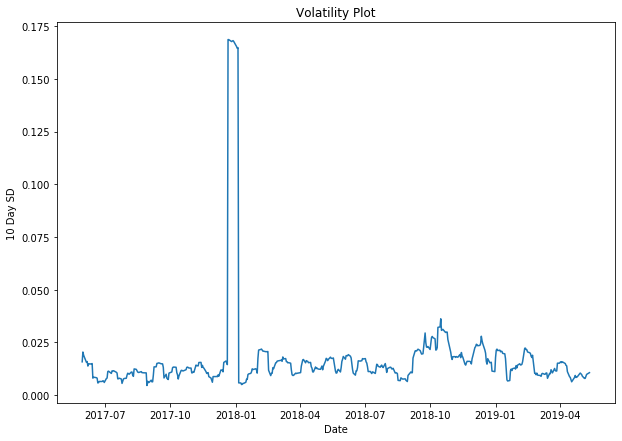

In [30]:
plt.figure(figsize=(10,7))
plt.plot(volatility_mnm)
plt.title("Volatility Plot")
plt.xlabel("Date")
plt.ylabel("10 Day SD")
plt.show()

## 2.8

In [31]:
nifty = pd.read_csv("Nifty50.csv")
nifty["Date"] = pd.to_datetime(nifty["Date"])

In [32]:
df_temp = nifty.filter(['Close','Date']).set_index('Date')
df_temp = df_temp.pct_change().dropna()

In [33]:
df_temp.head()

,Close
Date,
2017-05-16,0.007078
2017-05-17,0.001419
2017-05-18,-0.010109
2017-05-19,-0.000164
2017-05-22,0.001098


In [34]:
volatility_nifty = df_temp.rolling(10).std().dropna() #calculating 10 day SD

In [35]:
volatility_nifty.head()

,Close
Date,
2017-05-29,0.007455
2017-05-30,0.007218
2017-05-31,0.007233
2017-06-01,0.006148
2017-06-02,0.006125


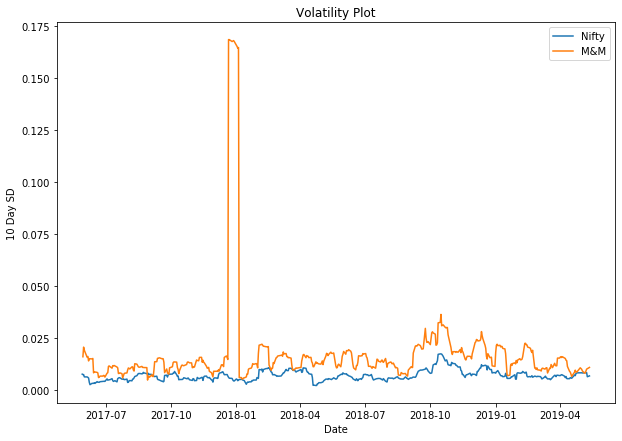

In [36]:
plt.figure(figsize=(10,7))
plt.plot(volatility_nifty)
plt.plot(volatility_mnm)
plt.title("Volatility Plot")
plt.legend(["Nifty","M&M"])
plt.xlabel("Date")
plt.ylabel("10 Day SD")
plt.show()

## 2.9

Moving Averages

In [37]:
df_3 = df_1.copy().set_index('Date')
df_3 = df_3.filter(['Close Price'])

In [38]:
df_pct = df_3.pct_change().dropna() #calculate percentage change

In [39]:
mov_avg_21 = df_pct.rolling(window = 21).mean()
mov_avg_34 = df_pct.rolling(window = 34).mean()

In [40]:
mov_avg_21.rename(columns = {'Close Price':'21 SMA'}, inplace = True)
mov_avg_34.rename(columns = {'Close Price':'34 SMA'}, inplace = True)
frames = [mov_avg_21['21 SMA'],mov_avg_34['34 SMA']]
combine = pd.concat(frames, axis =1).dropna()

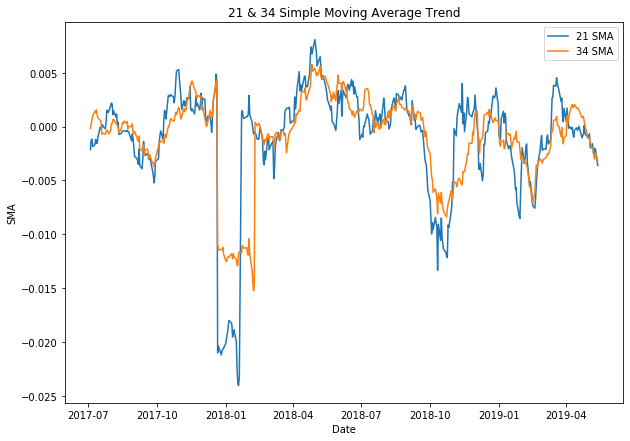

In [41]:
plt.figure(figsize=(10,7))
plt.plot(combine)
plt.legend(["21 SMA", "34 SMA"])
plt.title("21 & 34 Simple Moving Average Trend")
plt.xlabel("Date")
plt.ylabel("SMA")
plt.show()

## 2.10

Bolinger Bands

In [42]:
df_4 = df_1.copy().set_index('Date')
avg_stock_price = df_4.filter(['Average Price'])
df_4 = df_4.filter(['Close Price'])

In [43]:
avg_14 = df_4.rolling(14).mean().dropna()
std_14 = df_4.rolling(14).std().dropna()
avg_14.rename(columns = {'Close Price':'14 SMA'}, inplace = True)
std_14.rename(columns = {'Close Price':'14 SMA'}, inplace = True)

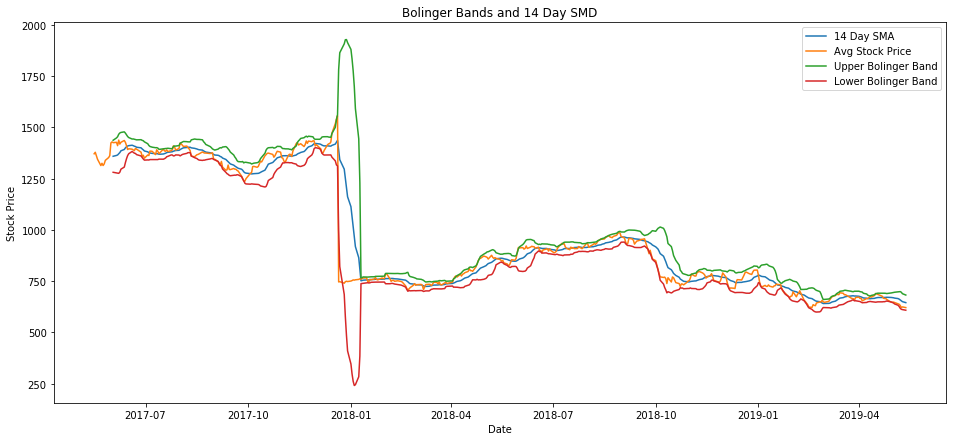

In [44]:
plt.figure(figsize=(16,7))
plt.plot(avg_14)
plt.plot(avg_stock_price)
plt.plot(avg_14 + 2*std_14)
plt.plot(avg_14 - 2*std_14)
plt.legend(["14 Day SMA", "Avg Stock Price", "Upper Bolinger Band", "Lower Bolinger Band"])
plt.title("Bolinger Bands and 14 Day SMD")
plt.ylabel("Stock Price")
plt.xlabel("Date")
plt.show()

Bolinger bands helps us to know weather the market is overbrought or oversold. The closer the prices move towards UBB the more overbought the market, and the closer the prices move to the LBB, the more oversold the market.

In the above market of M&M, we can see several occasions where the market is overbrought and oversold.

In [45]:
df_4.head()

,Close Price
Date,
2017-05-16,1366.35
2017-05-17,1378.80
2017-05-18,1352.85
2017-05-19,1333.40
2017-05-22,1306.25
